### Project : Thera Bank Personal Loan Campaign


#### Importing all the libraries

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes = True)

pd.options.display.float_format = '{:.4f}'.format

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython.core.display import display, HTML
display(HTML('<style>.container {width : 90%    !important }</style>'))


#The below imports are from sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report







#### Importing the datasets

In [171]:
basedf = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

#### copying the datasets

In [172]:
workingdf = basedf.copy()

In [173]:
#investigate the head
workingdf.head()

#Observation :
#Target column is Personal Loan.

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6000,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5000,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0000,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7000,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0000,2,0,0,0,0,0,1


In [174]:
#dropping the id column
workingdf.drop(['ID'], inplace = True, axis = 1)

In [175]:
#checking the datatypes and null values of each column 
workingdf.info()

#Observation :
# 1) None of the rows have null values - apparantly.
# 2) All the columns are identified as numericals.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [176]:
workingdf.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000
mean,45.3384,20.1046,73.7742,93152.5030,2.3964,1.9379,1.8810,56.4988,0.0960,0.1044,0.0604,0.5968,0.2940
std,11.4632,11.4680,46.0337,2121.8522,1.1477,1.7477,0.8399,101.7138,0.2946,0.3058,0.2383,0.4906,0.4556
min,23.0000,-3.0000,8.0000,9307.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,35.0000,10.0000,39.0000,91911.0000,1.0000,0.7000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,45.0000,20.0000,64.0000,93437.0000,2.0000,1.5000,2.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
75%,55.0000,30.0000,98.0000,94608.0000,3.0000,2.5000,3.0000,101.0000,0.0000,0.0000,0.0000,1.0000,1.0000
max,67.0000,43.0000,224.0000,96651.0000,4.0000,10.0000,3.0000,635.0000,1.0000,1.0000,1.0000,1.0000,1.0000


#### Initial Observations - Answer to point 1

1. The dataset has no null values
2. Mortgage, CCAvg and Income has skewed data.
3. All the fields are categorized as numerical type - These fields have been changed below.

#### EDA - Observations - Calculations Done below:
1. Changed the datatype of Family, Education,Securities Account, CD Account,Online,CreditCard to category.
2. Family , Education , Securities Account , CD Account, Online, CreditCard has only 2 values, Family has 4 values.
3. CCAvg and Income is skewed to the right.
4. Age and Experience has a very close linear correlation.
5. 3462 do not have any mortgage.
6. Only 106 do not have any Credit card expenditure.
7. if anyone does not have a security deposit , then they have smaller chance of Personal Loan.
8. Lower education does not buy Personal Loans.
9. Person with NO CD Account does not buy personal load majorly.
10. Person transcating online has more chances of buying personal loan.
11. person having no credit card does not buy personal loan.
12. Zip code has a very less correlation with any of the values.


#### The following transformations are performed.

1. Log + 1 transformation on CCAvg column
2. Log Transformation on Income column.


### The following are the columns that will be included in the modelling 

1) Age
2) Income_logTransform
3) Family
4) CCAvg_logTransform
5) Education
6) Mortgage
7) Personal Loan - target variable
8) Securities Account
9) CD Account
10) Online
11) CreditCard    



In [181]:
#number of people with zero mortgage
workingdf['Mortgage'].value_counts()

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64

In [182]:
workingdf['CCAvg'][workingdf['CCAvg'] == 0].count()

106

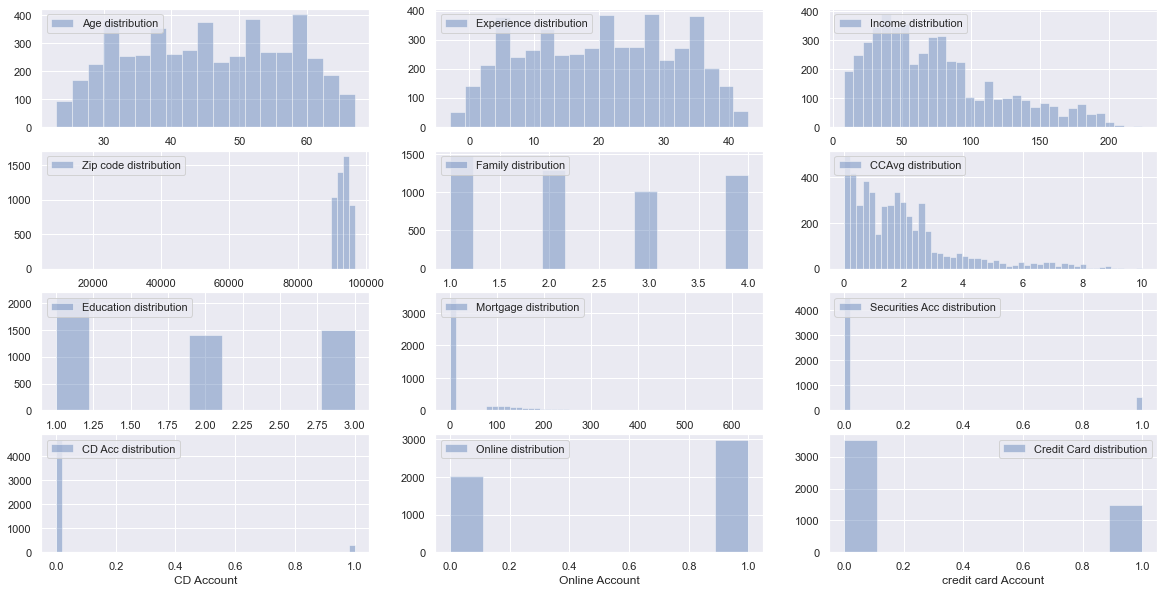

In [183]:
#lets get the distplot of all the columns (since all the columns are numerical)
figure, ax = plt.subplots(figsize = (20,10), nrows = 4, ncols= 3 );
sns.distplot(workingdf['Age'], ax = ax[0][0], label = "Age distribution", kde = False);
ax[0][0].set_xlabel('age');
ax[0][0].legend(loc = "upper left");

sns.distplot(workingdf['Experience'], ax = ax[0][1], label = "Experience distribution", kde = False);
ax[0][1].set_xlabel('Experience');
ax[0][1].legend(loc = "upper left");

sns.distplot(workingdf['Income'], ax = ax[0][2], label = "Income distribution", kde = False);
ax[0][2].set_xlabel('Income');
ax[0][2].legend(loc = "upper left");

sns.distplot(workingdf['ZIP Code'], ax = ax[1][0], label = "Zip code distribution", kde = False);
ax[1][0].set_xlabel('Zip code');
ax[1][0].legend(loc = "upper left");

sns.distplot(workingdf['Family'], ax = ax[1][1], label = "Family distribution", kde = False);
ax[1][1].set_xlabel('Family');
ax[1][1].legend(loc = "upper left");


sns.distplot(workingdf['CCAvg'], ax = ax[1][2], label = "CCAvg distribution", kde = False);
ax[1][2].set_xlabel('CCAvg');
ax[1][2].legend(loc = "upper left");


sns.distplot(workingdf['Education'], ax = ax[2][0], label = "Education distribution", kde = False);
ax[2][0].set_xlabel('Education');
ax[2][0].legend(loc = "upper left");


sns.distplot(workingdf['Mortgage'], ax = ax[2][1], label = "Mortgage distribution", kde = False);
ax[2][1].set_xlabel('Mortgage');
ax[2][1].legend(loc = "upper left");


sns.distplot(workingdf['Securities Account'], ax = ax[2][2], label = "Securities Acc distribution", kde = False);
ax[2][2].set_xlabel('Securities Account');
ax[2][2].legend(loc = "upper left");

sns.distplot(workingdf['CD Account'], ax = ax[3][0], label = "CD Acc distribution", kde = False);
ax[3][0].set_xlabel('CD Account');
ax[3][0].legend(loc = "upper left");


sns.distplot(workingdf['Online'], ax = ax[3][1], label = "Online distribution", kde = False);
ax[3][1].set_xlabel('Online Account');
ax[3][1].legend(loc = "upper left");


sns.distplot(workingdf['CreditCard'], ax = ax[3][2], label = "Credit Card distribution", kde = False);
ax[3][2].set_xlabel('credit card Account');
ax[3][2].legend(loc = "upper left");


plt.legend();

#I have not plotted the target vaiable here.
#observation :
#1) education, securities account, CD account, Online, credit card account are categorical variables.
#2) Majority of the people as mortgage as 0.
#3) family size can also be treated as category.
#4) CCAvg is highly skewed to the right

In [184]:
#converting the education, securities account, CD account, Online, credit card account to categorical variables.

workingdf['Education'] = workingdf['Education'].astype('category')


In [185]:
workingdf['Securities Account'] = workingdf['Securities Account'].astype('category')
workingdf['CD Account'] = workingdf['CD Account'].astype('category')
workingdf['Online'] = workingdf['Online'].astype('category')
workingdf['CreditCard'] = workingdf['CreditCard'].astype('category')

In [186]:
workingdf['Family'] = workingdf['Family'].astype('category')

In [187]:
#check the data type now.
workingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIP Code            5000 non-null   int64   
 4   Family              5000 non-null   category
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal Loan       5000 non-null   int64   
 9   Securities Account  5000 non-null   category
 10  CD Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(6), float64(1), int64(6)
memory usage: 303.5 KB


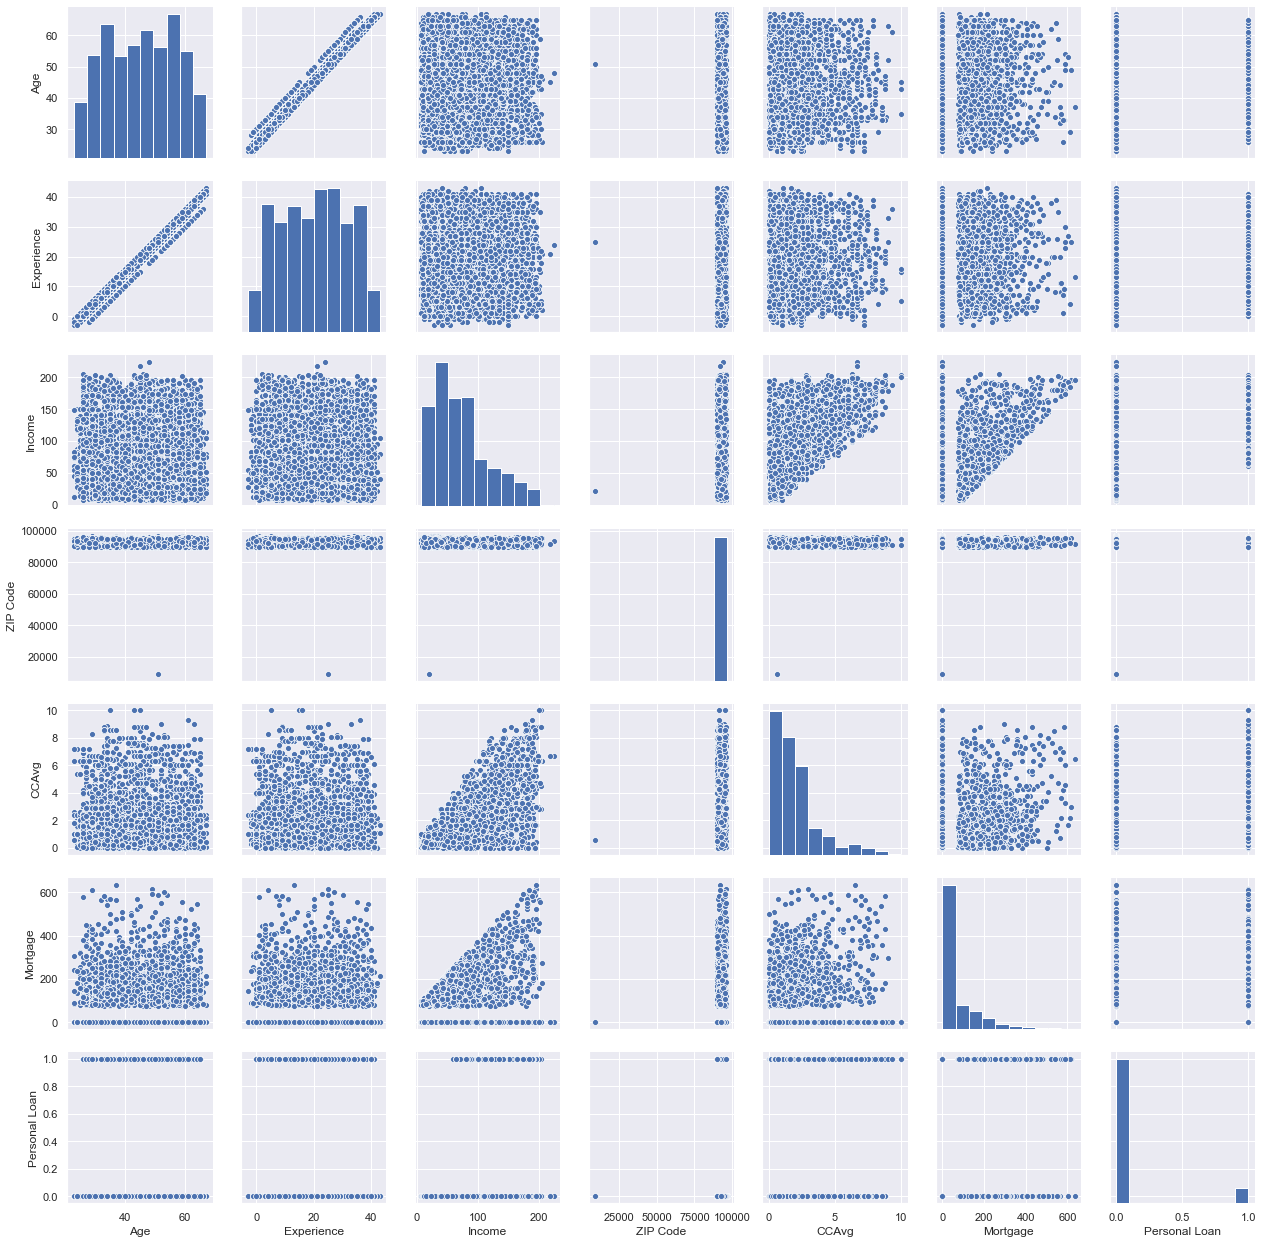

In [188]:
#let us check the pairplot for numerical columns 

workingdf_numerical = workingdf.select_dtypes(include = ['number'])

sns.pairplot(workingdf_numerical)

#Observation:
#1)Age and experience has linear correlation. I can only consider one of the Age or Experience variable in my model.
#2) Higher income group has higher mortgage and higher average cc spending.


In [189]:
#let us look at the null values for each columns.

workingdf.isnull().sum()

#Observation:
#No null values in any columns.

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [190]:
#unique values in any columns
print("Table of unique values for all the columns")
row = "| {colname:<20s} | {numunique:<16s} | {percentage:<16s} |".format
print(row(colname = 'Columns', numunique = 'Unique values', percentage = '%unique values'))

row = "| {colname:<20s} | {numunique:16d} | {percentage:16.3f} |".format
for cols in workingdf.columns:
    colname = cols
    nunique = workingdf[colname].nunique()
    percentageunique = workingdf[colname].nunique() / workingdf[colname].count() * 100
    
    print(row(colname = colname, numunique = nunique, percentage = percentageunique))

Table of unique values for all the columns
| Columns              | Unique values    | %unique values   |
| Age                  |               45 |            0.900 |
| Experience           |               47 |            0.940 |
| Income               |              162 |            3.240 |
| ZIP Code             |              467 |            9.340 |
| Family               |                4 |            0.080 |
| CCAvg                |              108 |            2.160 |
| Education            |                3 |            0.060 |
| Mortgage             |              347 |            6.940 |
| Personal Loan        |                2 |            0.040 |
| Securities Account   |                2 |            0.040 |
| CD Account           |                2 |            0.040 |
| Online               |                2 |            0.040 |
| CreditCard           |                2 |            0.040 |


In [191]:
#Mortgage distribution is another very interesting factor
workingdf['Mortgage'].value_counts(normalize = True)

#Observation :
#70 % of people have zero mortgage.


0     0.6924
98    0.0034
103   0.0032
119   0.0032
83    0.0032
       ...  
541   0.0002
509   0.0002
505   0.0002
485   0.0002
577   0.0002
Name: Mortgage, Length: 347, dtype: float64

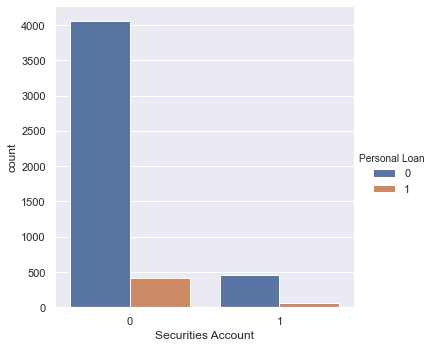

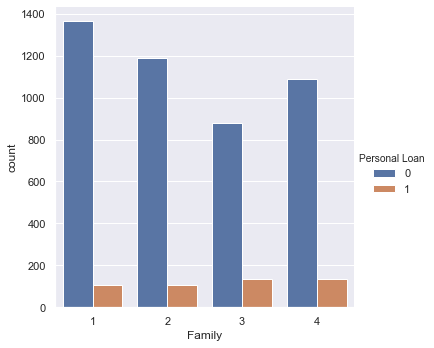

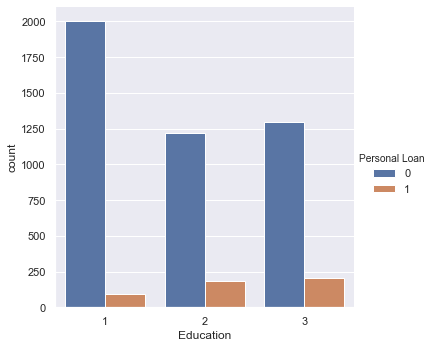

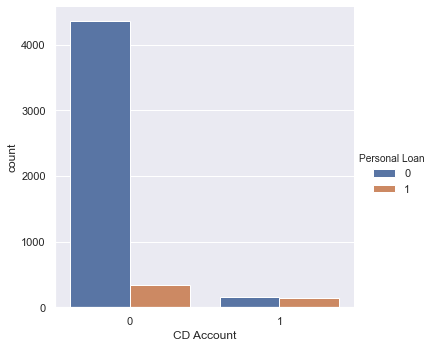

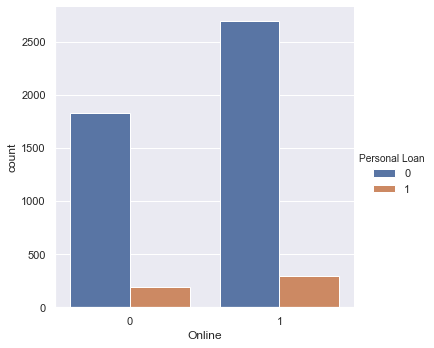

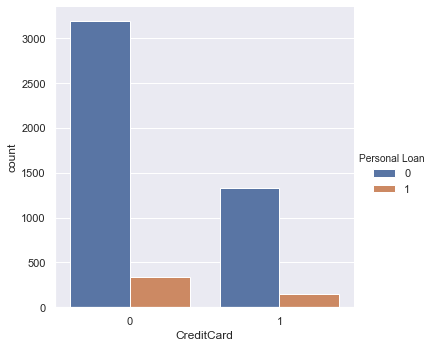

In [192]:
#lets see if there is any relationship between the categorical variables and target variabels.
sns.catplot(x = "Securities Account", hue = "Personal Loan", kind = "count", data = workingdf);
sns.catplot(x = "Family", hue = "Personal Loan", kind = "count", data = workingdf);
sns.catplot(x = "Education", hue = "Personal Loan", kind = "count", data = workingdf);
sns.catplot(x = "CD Account", hue = "Personal Loan", kind = "count", data = workingdf);
sns.catplot(x = "Online", hue = "Personal Loan", kind = "count", data = workingdf);
sns.catplot(x = "CreditCard", hue = "Personal Loan", kind = "count", data = workingdf);


#observation :
#1) if anyone does not have a security deposit , then they have smaller chance of Personal Loan.
#2) Lower education does not buy Personal Loans.
#3) Person with NO CD Account does not buy personal load majorly.
#4) Person transcating online has more chances of buying personal loan.
#5) person having no credit card does not buy personal loan.

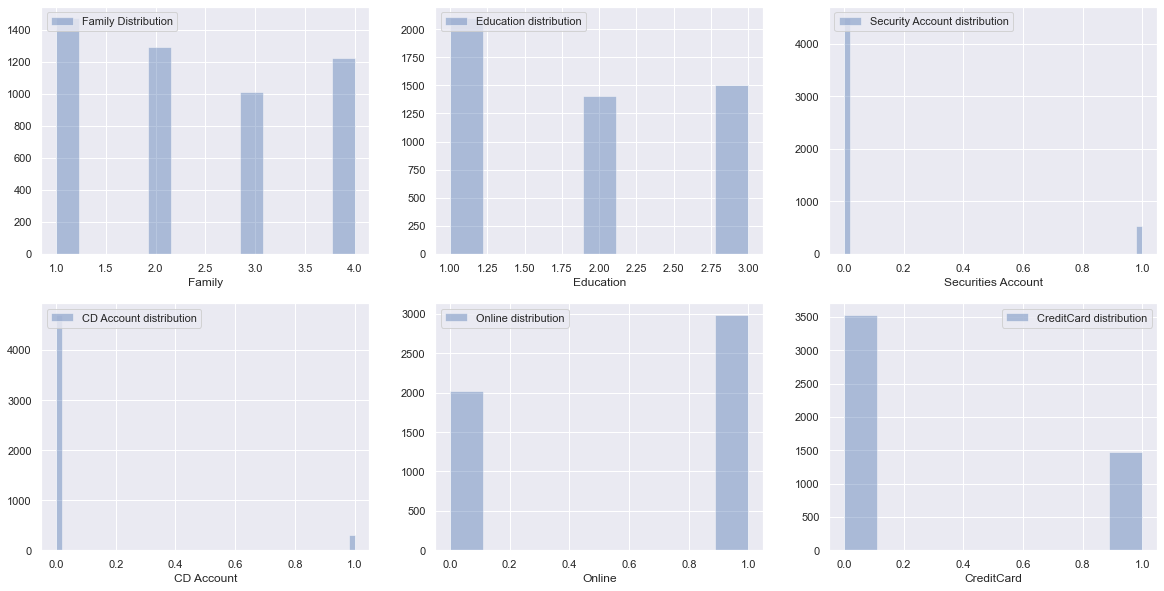

In [193]:
#lets do a distplot of categorical variables now.



#Family              5000 non-null   category
 #Education           5000 non-null   category
 
 #Securities Account  5000 non-null   category
 #CD Account          5000 non-null   category
 #Online              5000 non-null   category
 #CreditCard          5000 non-null   category

figure, ax = plt.subplots(figsize = (20,10), nrows = 2, ncols= 3 );
sns.distplot(workingdf['Family'], ax = ax[0][0], label = "Family Distribution", kde = False);
ax[0][0].set_xlabel('Family');
ax[0][0].legend(loc = "upper left");

sns.distplot(workingdf['Education'], ax = ax[0][1], label = "Education distribution", kde = False);
ax[0][1].set_xlabel('Education');
ax[0][1].legend(loc = "upper left");


sns.distplot(workingdf['Securities Account'], ax = ax[0][2], label = "Security Account distribution", kde = False);
ax[0][2].set_xlabel('Securities Account');
ax[0][2].legend(loc = "upper left");


sns.distplot(workingdf['CD Account'], ax = ax[1][0], label = "CD Account distribution", kde = False);
ax[1][0].set_xlabel('CD Account');
ax[1][0].legend(loc = "upper left");


sns.distplot(workingdf['Online'], ax = ax[1][1], label = "Online distribution", kde = False);
ax[1][1].set_xlabel('Online');
ax[1][1].legend(loc = "upper left");


sns.distplot(workingdf['CreditCard'], ax = ax[1][2], label = "CreditCard distribution", kde = False);
ax[1][2].set_xlabel('CreditCard');
ax[1][2].legend(loc = "upper left");




plt.legend();

#observation :
#1) Security accoutn, cd accoutn and credit card follow the same trend.
#2) 
#3) Person with NO CD Account does not buy personal load majorly.
#4) Person transcating online has more chances of buying personal loan.
#5) person having no credit card does not buy personal loan.


In [194]:
workingdf_category = workingdf.select_dtypes(include = ['category'])
workingdf_category.apply(pd.value_counts)

,Family,Education,Securities Account,CD Account,Online,CreditCard
0,nan,nan,4478.0000,4698.0000,2016.0000,3530.0000
1,1472.0000,2096.0000,522.0000,302.0000,2984.0000,1470.0000
2,1296.0000,1403.0000,nan,nan,nan,nan
3,1010.0000,1501.0000,nan,nan,nan,nan
4,1222.0000,nan,nan,nan,nan,nan


In [195]:
#lets look at the correlation matrix for various numerical columns.

workingdf_numerical.corr()

,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Personal Loan
Age,1.0000,0.9942,-0.0553,-0.0292,-0.0520,-0.0125,-0.0077
Experience,0.9942,1.0000,-0.0466,-0.0286,-0.0501,-0.0106,-0.0074
Income,-0.0553,-0.0466,1.0000,-0.0164,0.6460,0.2068,0.5025
ZIP Code,-0.0292,-0.0286,-0.0164,1.0000,-0.0041,0.0074,0.0001
CCAvg,-0.0520,-0.0501,0.6460,-0.0041,1.0000,0.1099,0.3669
Mortgage,-0.0125,-0.0106,0.2068,0.0074,0.1099,1.0000,0.1421
Personal Loan,-0.0077,-0.0074,0.5025,0.0001,0.3669,0.1421,1.0000


In [196]:
#applying log + 1  transformation to CCAvg, Income and Mortgage

workingdf['CCAvg_logTransform'] = np.log(workingdf['CCAvg'] + 1)


workingdf['CCAvg_logTransform'].describe()

count   5000.0000
mean       0.9294
std        0.5333
min        0.0000
25%        0.5306
50%        0.9163
75%        1.2528
max        2.3979
Name: CCAvg_logTransform, dtype: float64

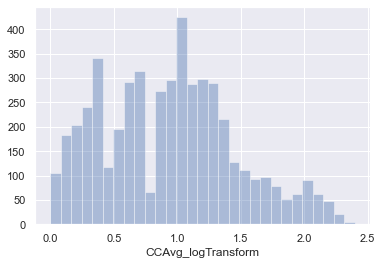

In [197]:
sns.distplot(workingdf['CCAvg_logTransform'], label = "CCAvg distribution", kde = False);

In [198]:
workingdf['Income_logTransform'] = np.log(workingdf['Income'])

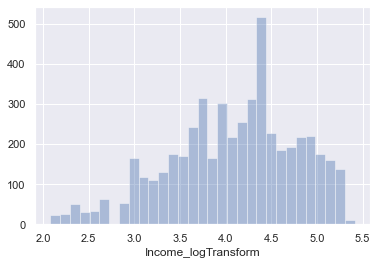

In [199]:
sns.distplot(workingdf['Income_logTransform'], label = "Income distribution", kde = False);

In [200]:
workingdf['Mortgage_logTransform'] = np.log(workingdf['Mortgage'] + 1)

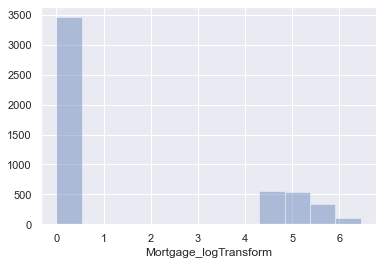

In [201]:
sns.distplot(workingdf['Mortgage_logTransform'], label = "Mortgage distribution", kde = False);

#Observation:
#1) Scaling Mortgage column does not really convert the values to normal distribution.

### Splitting the model 

In [202]:
workingdf.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard', 'CCAvg_logTransform',
       'Income_logTransform', 'Mortgage_logTransform'],
      dtype='object')

In [206]:
dfX = workingdf[['Age', 'Income_logTransform', 'Family', 'CCAvg_logTransform','Education', 'Mortgage', 'Securities Account','CD Account', 'Online']]
dfY = workingdf['Personal Loan']


#### The below line splits the model into train and test sets.

In [208]:
dfX_train, dfX_test, dfY_train, dfY_test = train_test_split(dfX, dfY, test_size = 0.3, random_state = 42)

In [210]:
#we now use Logistic Regression module with lasso regression:

logisticRegr = LogisticRegression(penalty = 'l2', random_state = 42)

In [211]:
logisticRegr.fit(dfX_train, dfY_train)

D:\anaconda_installation\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [212]:
y_pred = logisticRegr.predict(dfX_test)

### Accuracy of the model

In [226]:
print(logisticRegr.score(dfX_test, dfY_test))

0.93


### Confusion Matrix

In [233]:
confusion_matrix(dfY_test, y_pred)
row = "| {TN:<5s} | {FP:<5s} | {FN:<5s} |{TP:<5s} |".format
print(row(TN = 'TN', FP='FP', FN = 'FN', TP= 'TP'))
print("-------------------------------------")

tn, fp, fn, tp  = confusion_matrix(dfY_test, y_pred).ravel()
row = "| {TN:<5d} | {FP:<5d} | {FN:<5d} |{TP:<5d} |".format
print(row(TN = tn, FP = fp, FN = fn , TP = tp))

array([[1334,    9],
       [  96,   61]], dtype=int64)

| TN    | FP    | FN    |TP    |
-------------------------------------
| 1334  | 9     | 96    |61    |


In [221]:
print(classification_report(dfY_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1343
           1       0.87      0.39      0.54       157

   micro avg       0.93      0.93      0.93      1500
   macro avg       0.90      0.69      0.75      1500
weighted avg       0.93      0.93      0.92      1500



<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

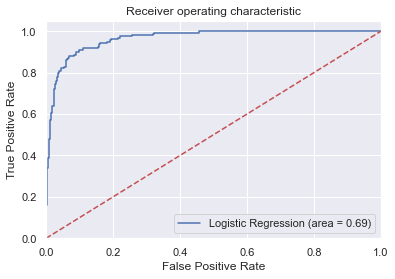

In [223]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(dfY_test, logisticRegr.predict(dfX_test))
fpr, tpr, thresholds = roc_curve(dfY_test, logisticRegr.predict_proba(dfX_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()



### Observations:
1. We have high precision on both the the not buying and the buying prediction. 
2. Since precision is TP/TP + FP, we ahve good model prediction of the outcome. 
3. the recall is : TP/TP + FN , we can see , recall for 1 is higher, which is good as we only want people who can afford to buy personal loans.
4. The AUC curve tells me that the model has good prediction capabilities.

### How can model perform better.

1. There are several variables that are skewed. for e.g : the feature Mortgage is highly skewed.
2. There are several catagorical variables that are skewed. for e.g: CD Account distribution, Security Accout distribution, Online transactions on which I have not performed any standardization. 
3. I have excluded zip code and experience - These fields can also play a role in model enhancement.